In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('churn_data.csv')
df.head()

,customer_id,customer_age,account_balance,months_with_company,num_of_transactions,customer_support_calls,satisfaction_score,last_login_days,has_premium_account,active_last_month,region,churn
0,CUST_00001,56,3469.444607,119,11,1,8,18,1,1,West,0
1,CUST_00002,69,1877.142247,35,16,4,6,23,1,1,North,0
2,CUST_00003,46,2115.504568,52,24,7,4,15,0,0,West,0
3,CUST_00004,32,4539.464834,75,16,2,3,23,1,0,West,0
4,CUST_00005,60,3481.296678,5,22,3,8,19,1,1,East,0


EDA

Basic Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 12 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   customer_id             1000000 non-null  object 
 1   customer_age            1000000 non-null  int64  
 2   account_balance         1000000 non-null  float64
 3   months_with_company     1000000 non-null  int64  
 4   num_of_transactions     1000000 non-null  int64  
 5   customer_support_calls  1000000 non-null  int64  
 6   satisfaction_score      1000000 non-null  int64  
 7   last_login_days         1000000 non-null  int64  
 8   has_premium_account     1000000 non-null  int64  
 9   active_last_month       1000000 non-null  int64  
 10  region                  1000000 non-null  object 
 11  churn                   1000000 non-null  int64  
dtypes: float64(1), int64(9), object(2)
memory usage: 91.6+ MB
None

Summary Statistics:
         customer

C:\Users\Admin\AppData\Local\Temp\ipykernel_14468\879636336.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='churn', data=df, palette='viridis')


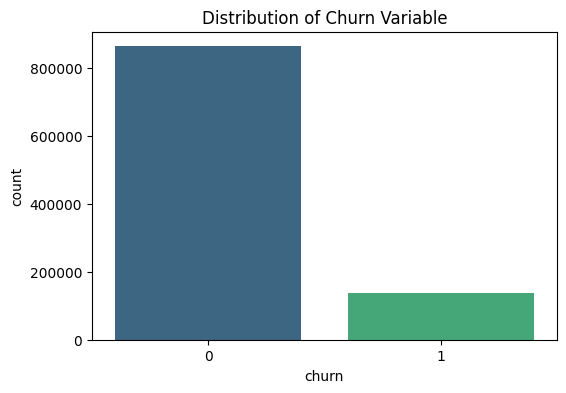

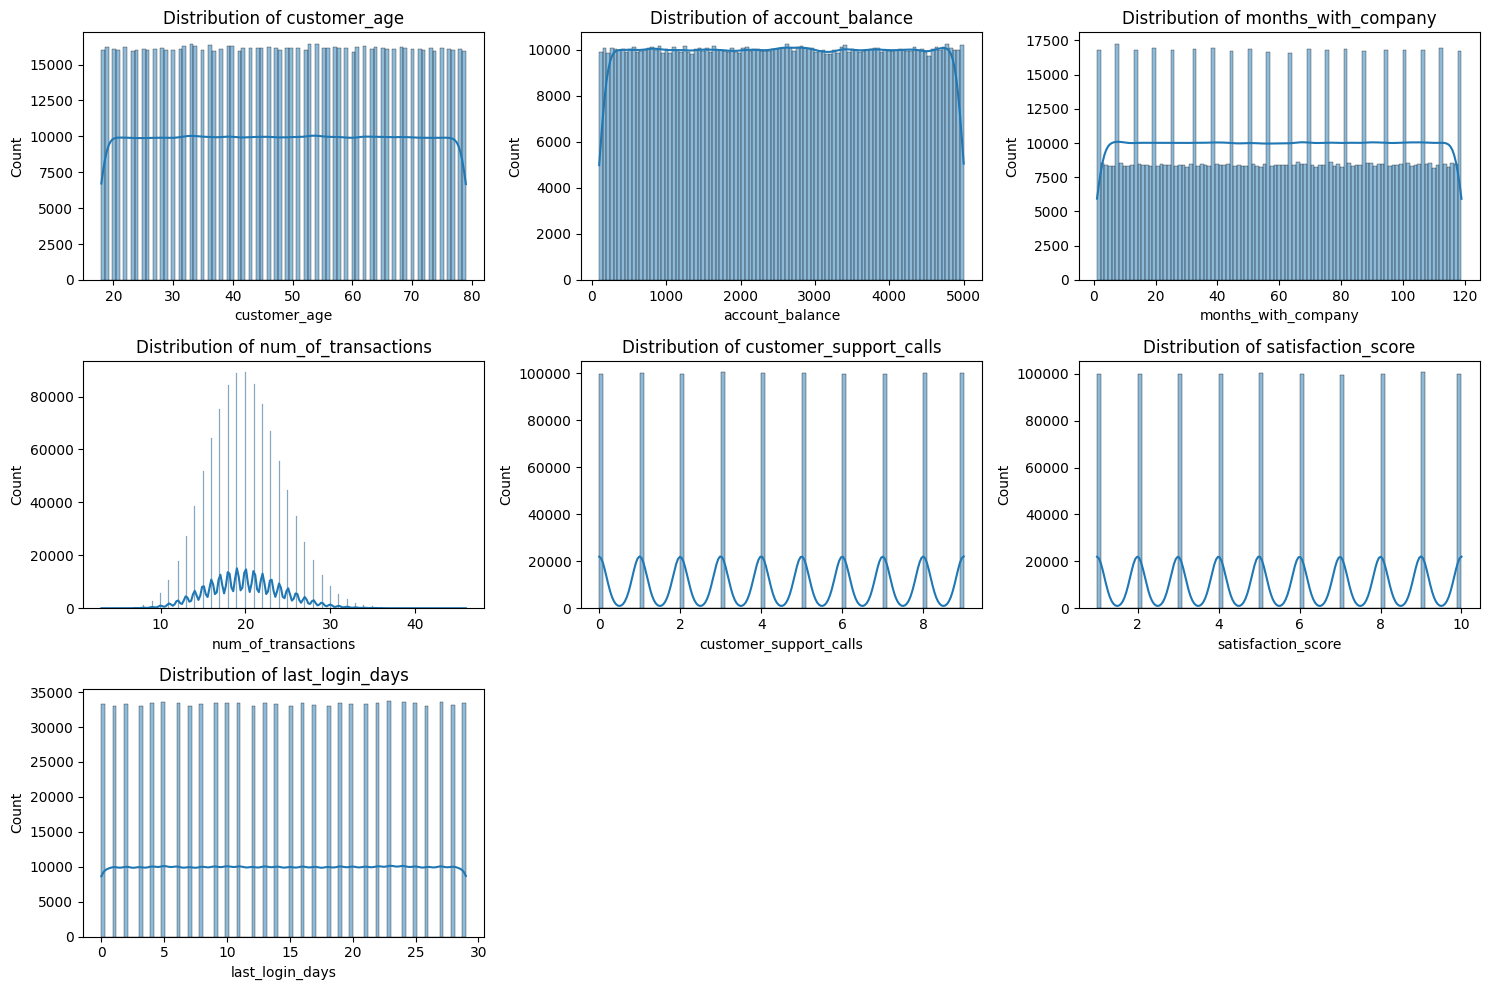

C:\Users\Admin\AppData\Local\Temp\ipykernel_14468\879636336.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=column, data=df, palette='Set2')
C:\Users\Admin\AppData\Local\Temp\ipykernel_14468\879636336.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=column, data=df, palette='Set2')
C:\Users\Admin\AppData\Local\Temp\ipykernel_14468\879636336.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=column, data=df, palette='Set2')


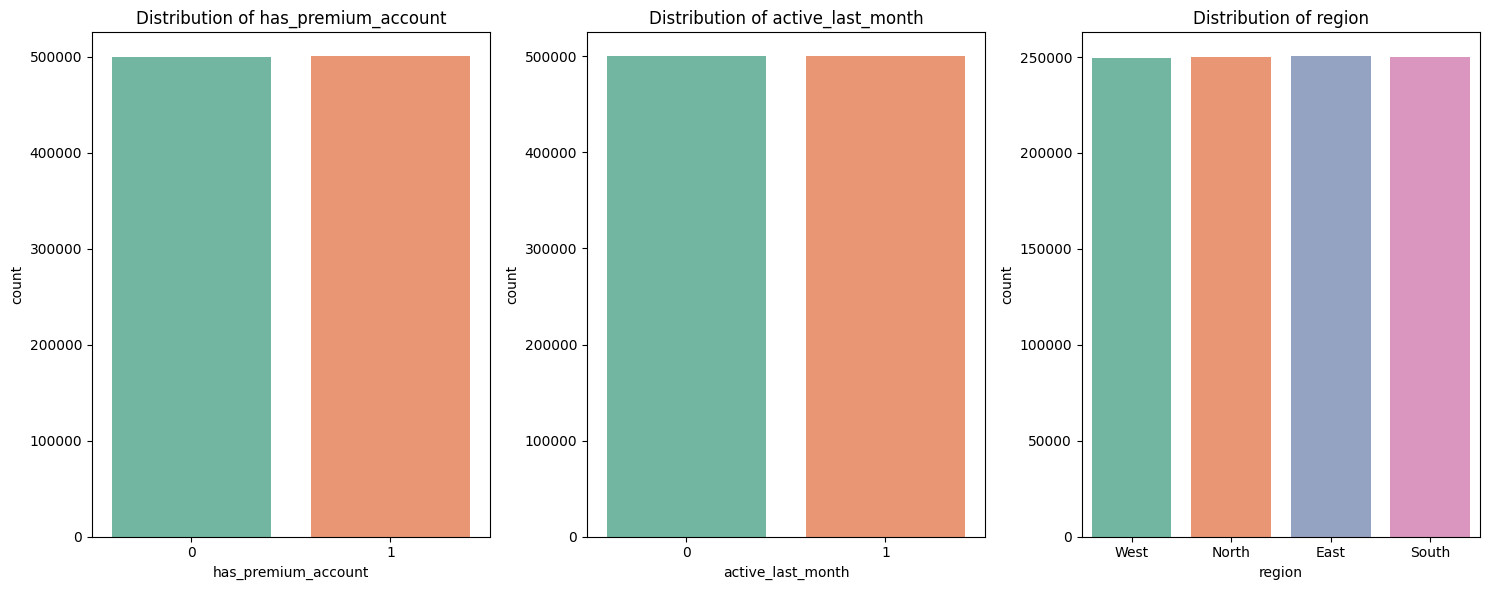

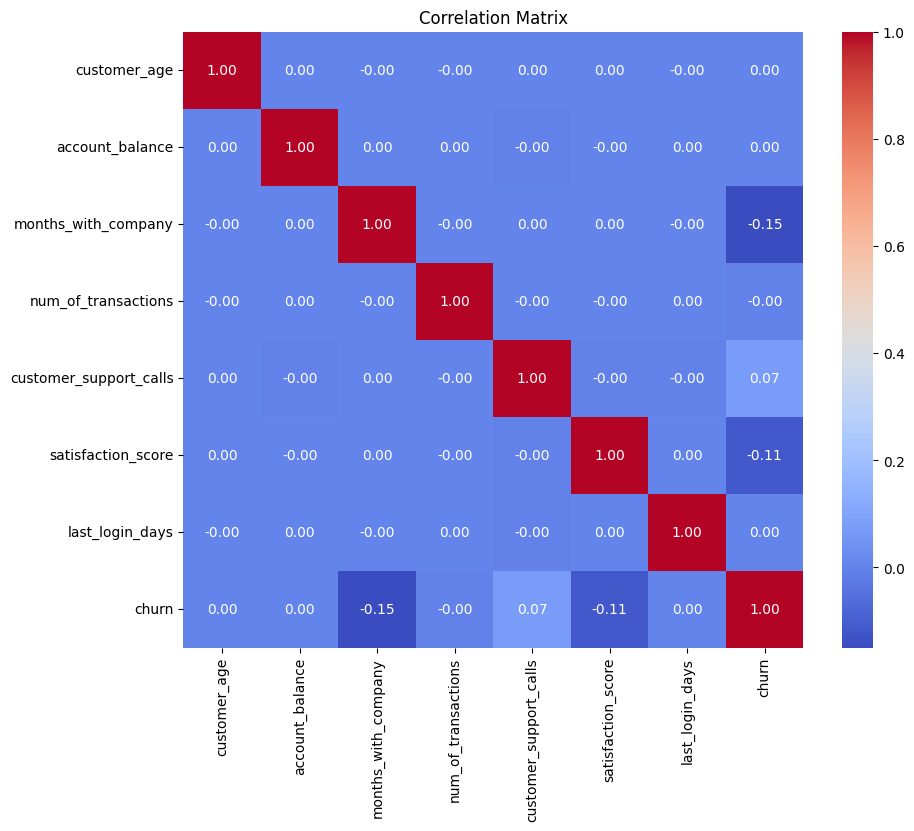

C:\Users\Admin\AppData\Local\Temp\ipykernel_14468\879636336.py:50: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='churn', y=column, data=df, palette='Set1')
C:\Users\Admin\AppData\Local\Temp\ipykernel_14468\879636336.py:50: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='churn', y=column, data=df, palette='Set1')
C:\Users\Admin\AppData\Local\Temp\ipykernel_14468\879636336.py:50: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='churn', y=column, data=df, palette='Set1')
C:\Users\Admin\AppData\Local\Temp\ipykernel_14468\879636336.py:50: Fut

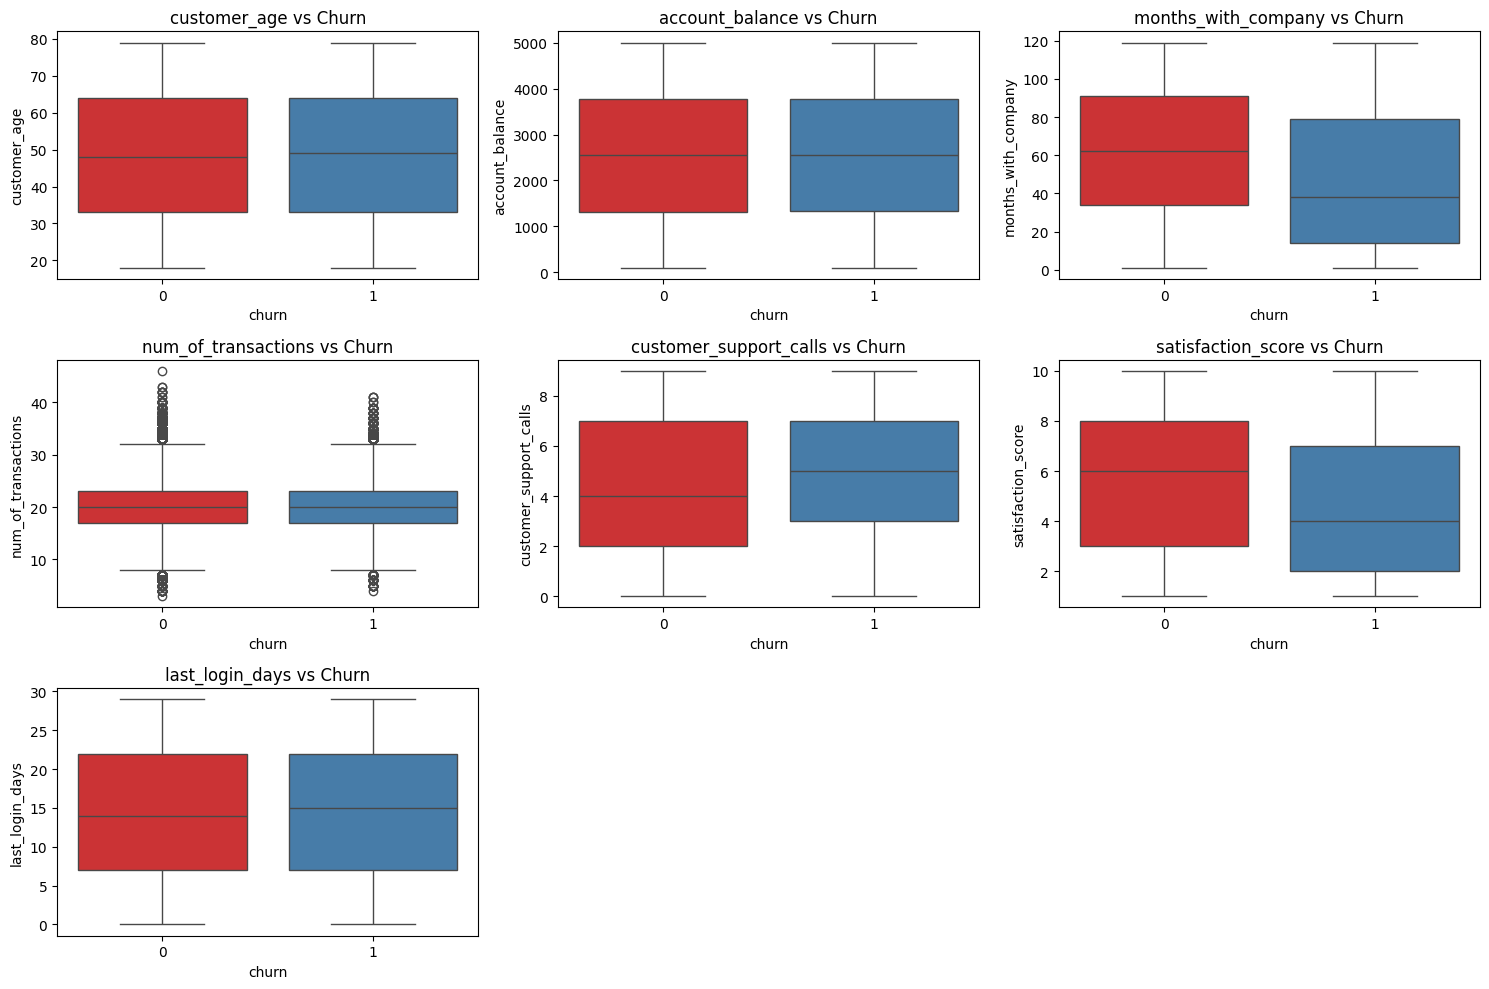

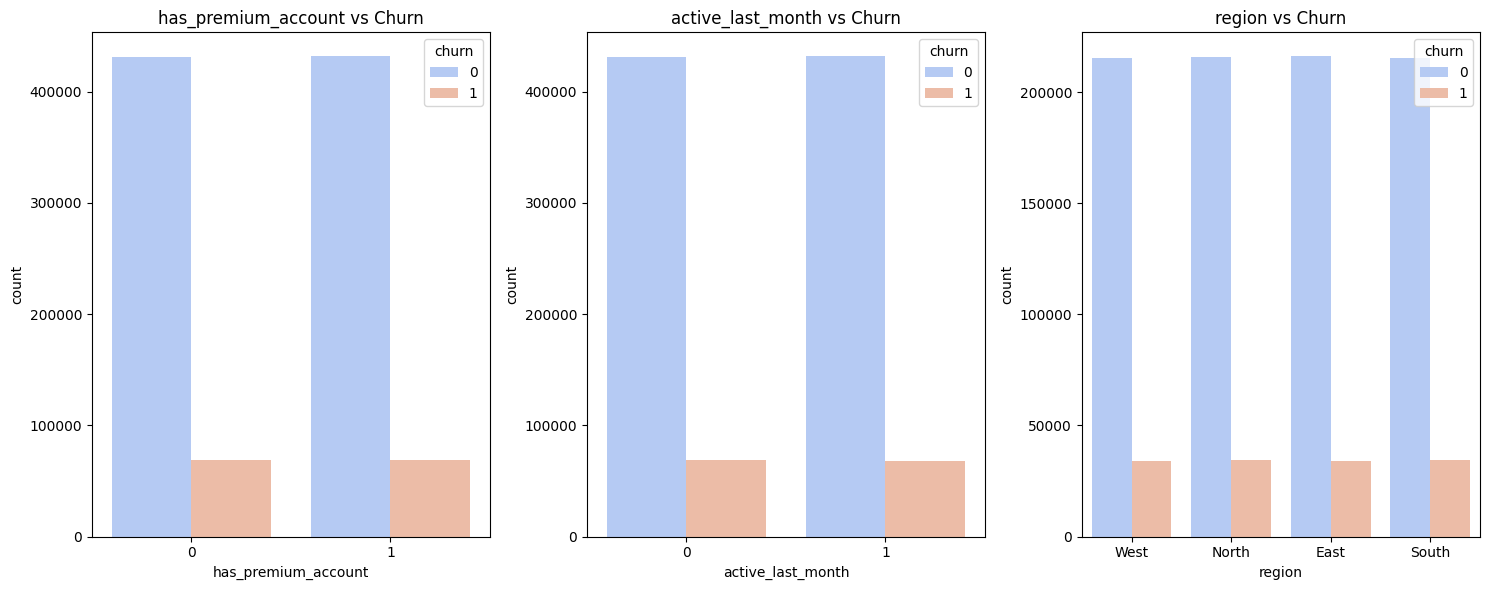

In [3]:
# 1. Overview of the Data
print("Basic Info:")
print(df.info())
print("\nSummary Statistics:")
print(df.describe())

# 2. Missing Values
print("\nMissing Values:")
print(df.isnull().sum())

# 3. Distribution of Churn Variable
plt.figure(figsize=(6, 4))
sns.countplot(x='churn', data=df, palette='viridis')
plt.title("Distribution of Churn Variable")
plt.show()

# 4. Numerical Feature Distributions
numerical_columns = ['customer_age', 'account_balance', 'months_with_company',
                     'num_of_transactions', 'customer_support_calls', 'satisfaction_score',
                     'last_login_days']
plt.figure(figsize=(15, 10))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(3, 3, i)
    sns.histplot(df[column], kde=True)
    plt.title(f"Distribution of {column}")
plt.tight_layout()
plt.show()

# 5. Categorical Feature Distributions
categorical_columns = ['has_premium_account', 'active_last_month', 'region']
plt.figure(figsize=(15, 6))
for i, column in enumerate(categorical_columns, 1):
    plt.subplot(1, 3, i)
    sns.countplot(x=column, data=df, palette='Set2')
    plt.title(f"Distribution of {column}")
plt.tight_layout()
plt.show()

# 6. Correlation Analysis
plt.figure(figsize=(10, 8))
corr_matrix = df[numerical_columns + ['churn']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix")
plt.show()

# 7. Feature Interactions with Churn
plt.figure(figsize=(15, 10))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(x='churn', y=column, data=df, palette='Set1')
    plt.title(f"{column} vs Churn")
plt.tight_layout()
plt.show()

# 8. Categorical Feature Interaction with Churn
plt.figure(figsize=(15, 6))
for i, column in enumerate(categorical_columns, 1):
    plt.subplot(1, 3, i)
    sns.countplot(x=column, hue='churn', data=df, palette='coolwarm')
    plt.title(f"{column} vs Churn")
plt.tight_layout()
plt.show()

Modeling

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve, f1_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

In [ ]:
#!pip install tensorflow


     -------------------------------------- 390.0/390.0 MB 3.9 MB/s eta 0:00:00
  Using cached gast-0.6.0-py3-none-any.whl (21 kB)
     ---------------------------------------- 1.5/1.5 MB 7.9 MB/s eta 0:00:00
  Using cached libclang-18.1.1-py2.py3-none-win_amd64.whl (26.4 MB)
  Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
  Using cached opt_einsum-3.4.0-py3-none-any.whl (71 kB)
     ---------------------------------------- 4.3/4.3 MB 13.7 MB/s eta 0:00:00
     ---------------------------------------- 3.0/3.0 MB 13.5 MB/s eta 0:00:00
     -------------------------------------- 126.7/126.7 KB 7.8 MB/s eta 0:00:00
  Using cached tensorboard-2.18.0-py3-none-any.whl (5.5 MB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
     ---------------------------------------- 1.3/1.3 MB 11.8 MB/s eta 0:00:00
  Using cached termcolor-2.5.0-py3-none-any.whl (7.8 kB)
  Using cached absl_py-2.1.0-py3-none-any.whl (133 kB)
  Using cached requests-2.32.3-py3-none-any.whl (64 kB)
 

You should consider upgrading via the 'D:\college\MSRIT\workshop\msr_env\Scripts\python.exe -m pip install --upgrade pip' command.


In [9]:
# Prepare features and labels
X = df.drop(columns=['customer_id', 'churn'])
y = df['churn']

In [10]:
# One-hot encode categorical features
X = pd.get_dummies(X, drop_first=True)

In [11]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Train and test split completed.")
print(f"Training data shape: {X_train.shape}")
print(f"Testing data shape: {X_test.shape}")

Train and test split completed.
Training data shape: (800000, 12)
Testing data shape: (200000, 12)


In [12]:
# Define the ANN model
model = Sequential()
model.add(Dense(64, input_shape=(X_train.shape[1],), activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))  # Output layer for binary classification

d:\college\MSRIT\workshop\msr_env\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [13]:
# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])
print("Model compiled successfully.")

Model compiled successfully.


In [14]:
# Print model summary
print("\nModel Summary:")
model.summary()


Model Summary:


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,945 (11.50 KB)

 Trainable params: 2,945 (11.50 KB)

 Non-trainable params: 0 (0.00 B)

In [15]:
# Train the model
print("Starting model training...")
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test), verbose=1)
print("Model training completed.")

Starting model training...
Epoch 1/20
25000/25000 ━━━━━━━━━━━━━━━━━━━━ 101s 4ms/step - accuracy: 0.8250 - loss: 0.9338 - val_accuracy: 0.8665 - val_loss: 0.3721
Epoch 2/20
25000/25000 ━━━━━━━━━━━━━━━━━━━━ 92s 4ms/step - accuracy: 0.8678 - loss: 0.3803 - val_accuracy: 0.8780 - val_loss: 0.3599
Epoch 3/20
25000/25000 ━━━━━━━━━━━━━━━━━━━━ 92s 4ms/step - accuracy: 0.8791 - loss: 0.3563 - val_accuracy: 0.8785 - val_loss: 0.3537
Epoch 4/20
25000/25000 ━━━━━━━━━━━━━━━━━━━━ 83s 3ms/step - accuracy: 0.8805 - loss: 0.3534 - val_accuracy: 0.8840 - val_loss: 0.3468
Epoch 5/20
25000/25000 ━━━━━━━━━━━━━━━━━━━━ 156s 6ms/step - accuracy: 0.8818 - loss: 0.3507 - val_accuracy: 0.8816 - val_loss: 0.3500
Epoch 6/20
25000/25000 ━━━━━━━━━━━━━━━━━━━━ 65s 3ms/step - accuracy: 0.8819 - loss: 0.3503 - val_accuracy: 0.8828 - val_loss: 0.3491
Epoch 7/20
25000/25000 ━━━━━━━━━━━━━━━━━━━━ 61s 2ms/step - accuracy: 0.8827 - loss: 0.3490 - val_accuracy: 0.8788 - val_loss: 0.3546
Epoch 8/20
25000/25000 ━━━━━━━━━━━━━━━━━

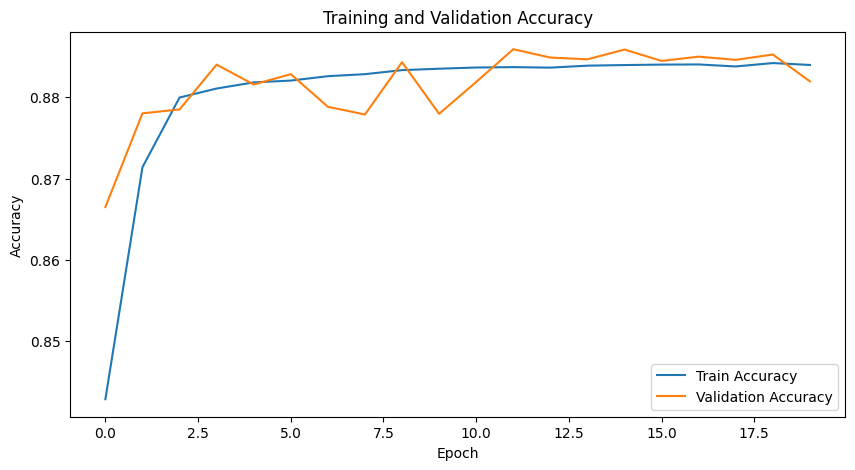

In [16]:
# Plot training history
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.show()

In [17]:
# Predictions
y_pred_proba = model.predict(X_test).ravel()
y_pred = (y_pred_proba > 0.5).astype(int)
print("Predictions on test data completed.")

6250/6250 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step
Predictions on test data completed.


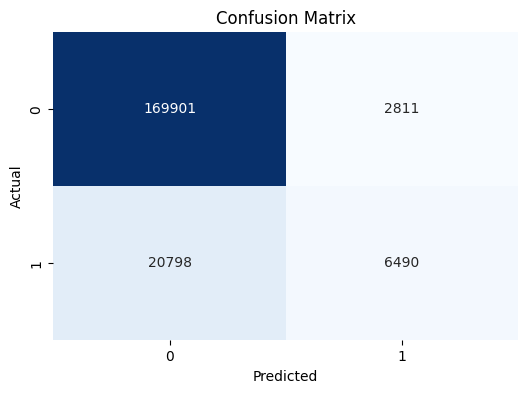

In [18]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [19]:
# Evaluation metrics
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)
print(f"F1 Score: {f1}")
print(f"ROC-AUC Score: {roc_auc}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

F1 Score: 0.3547514280248162
ROC-AUC Score: 0.6463662972891773

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.98      0.94    172712
           1       0.70      0.24      0.35     27288

    accuracy                           0.88    200000
   macro avg       0.79      0.61      0.64    200000
weighted avg       0.86      0.88      0.86    200000



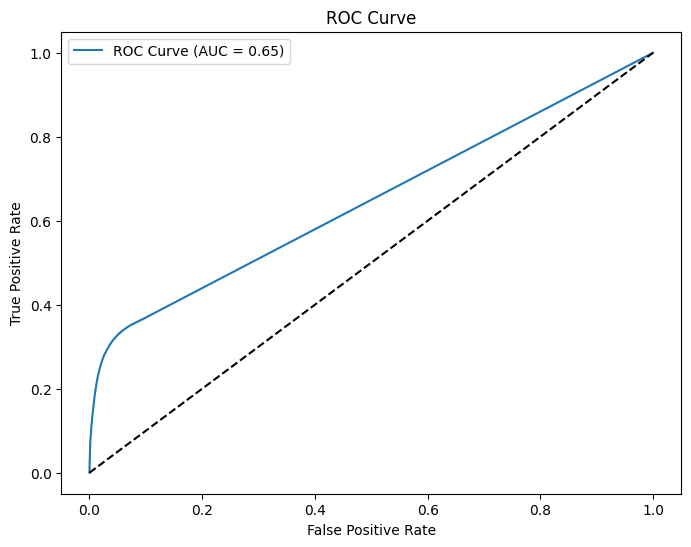

In [20]:
# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

In [21]:
# Save test predictions with customer ID and churn
test_results = X_test.copy()
test_results['customer_id'] = df.loc[X_test.index, 'customer_id'].values
test_results['actual_churn'] = y_test.values
test_results['predicted_churn'] = y_pred
test_results = test_results[['customer_id', 'actual_churn', 'predicted_churn']]
print("\nTest results with customer ID and churn:")
print(test_results.head())


Test results with customer ID and churn:
        customer_id  actual_churn  predicted_churn
987231  CUST_987232             0                0
79954    CUST_79955             0                0
567130  CUST_567131             0                0
500891  CUST_500892             0                0
55399    CUST_55400             0                0


In [22]:
# Save the results to a new DataFrame or file if needed
test_results.to_csv('test_predictions.csv', index=False)
print("Test predictions saved to test_predictions.csv")

Test predictions saved to test_predictions.csv
